* 1 Problem
* 2 Load and check data
    * 2.1 load data
    * 2.2 Outlier detection
    * 2.3 checking unbalanced classes
    * 2.4 check for null and missing values
* 3 Feature analysis
    * 3.1 Numerical values
    * 3.2 Categorical values
* 4 Filling missing Values
* 5 Feature engineering
* 6 Modeling
    * 6.1 Cross validate models
    * 6.2 Creating pipeline
    * 6.3 Hyperparamater tunning for best models
    * 6.4 Plot learning curves
    * 6.5 Feature importance of the tree based classifiers
    * 6.6 Prediction

## 1 - Definição do problema

## 2 - Carregando e checando a base

In [7]:
from collections import Counter

# Bibliotecas de análise e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de algoritmos de Machine Learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Bibliotecas de validação, pré-processamento e metrificação dos modelos
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, accuracy_score

from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

# Bibliotecas para desenvolver pipelines de pré-processmaneto para os modelos
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [8]:
# Configurações iniciais de visualização

%matplotlib inline
pd.options.display.max_columns = None
plt.rcParams['figure.figsize'] = (10 , 5)
sns.set_style(style='whitegrid')

### 2.1 - Lendo os dados

In [9]:
df = pd.read_csv('data/TB_TBN_SISCAN_CITO_MAMA_PACNT.csv', sep=';')

In [10]:
df.sample(5)

,CO_SEQ_SISCAN_CITO_MAMA_PACNT,CO_UF_RESIDENCIA,CO_MUN_RESIDENCIA,NU_ANO_COMPETENCIA,NU_ANO_MES_COMPETENCIA,CO_RACA_COR,SG_SEXO,CO_FAIXA_ETARIA_PACIENTE,CO_ESCOLARIDADE,CO_INTERVALO_COLETA,CO_INTERVALO_EXAME,CO_TEMPO_EXAME,CO_RISCO_ELEVADO,TP_DESCARGA_PAPILAR,TP_NODULO,TP_LATERALIDADE_MAMA,TP_MATERIAL,TP_ADEQUABILIDAD_MATERIAL,TP_RESULTA_PUNCAO_ASPIRATIVA,TP_PROC_BENI_NEGA_MALI_COMPATI,TP_PADR_CITO_MALIG_INDET,TP_PADR_CITO_SUSP_MALIG,TP_PADR_CITO_POSI_MALIG,TP_PADRAO_CITOPATOL_AMOST,CO_PACIENTE,TP_LAUDO_CITOP,CO_TEM_NODULO,CO_ANO_RESULTADO,SG_UF_RESIDENCIA
35629,31087,27,270030,2013,201310,4,F,38,NaN,1,1,1,2,NaN,1.0,2,2,1,1.0,5.0,NaN,NaN,NaN,NaN,203869447700004,4,4.0,2013,AL
25590,20354,31,311870,2018,201803,4,F,15,NaN,2,3,1,2,NaN,1.0,1,2,1,1.0,3.0,NaN,NaN,NaN,NaN,704600159404128,4,2.0,2018,MG
34010,32856,50,500390,2016,201603,1,F,36,NaN,1,1,1,1,NaN,3.0,1,2,1,1.0,7.0,NaN,NaN,NaN,NaN,709209293494937,4,4.0,2016,MS
8312,8235,41,411370,2014,201406,1,F,46,NaN,1,3,1,2,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,2.0,706203562622068,5,4.0,2014,PR
10585,18604,41,410180,2018,201805,4,F,45,NaN,1,4,1,2,1.0,3.0,1,2,1,1.0,7.0,NaN,NaN,NaN,NaN,708505311063373,4,4.0,2018,PR


In [11]:
df.shape

(78984, 29)

In [12]:
df.describe() # Estatísticas descritivas dos dados

,CO_SEQ_SISCAN_CITO_MAMA_PACNT,CO_UF_RESIDENCIA,CO_MUN_RESIDENCIA,NU_ANO_COMPETENCIA,NU_ANO_MES_COMPETENCIA,CO_RACA_COR,CO_FAIXA_ETARIA_PACIENTE,CO_ESCOLARIDADE,CO_INTERVALO_COLETA,CO_INTERVALO_EXAME,CO_TEMPO_EXAME,CO_RISCO_ELEVADO,TP_DESCARGA_PAPILAR,TP_NODULO,TP_LATERALIDADE_MAMA,TP_MATERIAL,TP_ADEQUABILIDAD_MATERIAL,TP_RESULTA_PUNCAO_ASPIRATIVA,TP_PROC_BENI_NEGA_MALI_COMPATI,TP_PADR_CITO_MALIG_INDET,TP_PADR_CITO_SUSP_MALIG,TP_PADR_CITO_POSI_MALIG,TP_PADRAO_CITOPATOL_AMOST,CO_PACIENTE,TP_LAUDO_CITOP,CO_TEM_NODULO,CO_ANO_RESULTADO
count,78984.000000,78984.000000,78984.000000,78984.000000,78984.000000,78984.000000,78984.000000,463.000000,78984.000000,78984.000000,78984.000000,78984.000000,15590.000000,59537.000000,78984.000000,78984.000000,78984.000000,50884.000000,45611.000000,601.000000,2538.000000,2132.000000,18154.000000,7.898400e+04,78984.000000,73530.000000,78984.000000
mean,56340.109364,34.131837,342697.165793,2016.990454,201705.614061,11.804403,43.673225,3.053996,1.229768,2.497974,1.043844,2.102274,1.226940,1.556931,1.524068,1.892447,1.125924,1.237265,5.670496,2.415973,1.202128,1.671201,2.041809,6.883453e+14,4.306467,2.829444,2016.869341
std,50336.379723,9.627779,96178.753785,1.857743,185.217493,28.874601,13.992242,1.048241,0.653786,1.173058,0.253089,0.573766,0.418867,0.847393,0.499424,0.477324,0.331766,0.729474,1.566748,0.894433,0.401666,0.932371,0.915214,1.208205e+14,1.008238,1.289570,1.830351
min,1.000000,11.000000,110002.000000,2013.000000,201307.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.006873e+14,1.000000,1.000000,2013.000000
25%,19746.750000,28.000000,280030.000000,2015.000000,201512.000000,1.000000,34.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000,7.007030e+14,4.000000,2.000000,2015.000000
50%,39506.500000,31.000000,314415.000000,2017.000000,201707.000000,3.000000,44.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,6.000000,3.000000,1.000000,1.000000,2.000000,7.041053e+14,4.000000,4.000000,2017.000000
75%,61738.250000,41.000000,412405.000000,2019.000000,201902.000000,4.000000,52.000000,4.000000,1.000000,4.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1.000000,3.000000,2.000000,7.068008e+14,5.000000,4.000000,2018.000000
max,156224.000000,53.000000,530010.000000,2020.000000,202007.000000,99.000000,118.000000,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,4.000000,7.000000,3.000000,2.000000,3.000000,6.000000,9.800163e+14,6.000000,4.000000,2020.000000


In [13]:
# Informações da base como nome da coluna, tipo, quantidade e porcentagem de missing values
exploration = pd.DataFrame({
    'column': df.columns, 'type': df.dtypes, 'NA #': df.isna().sum(), 'NA %': round((df.isna().sum() / df.shape[0]) * 100, 2)
})

exploration.sort_values(by='NA %', ascending=False)

,column,type,NA #,NA %
CO_ESCOLARIDADE,CO_ESCOLARIDADE,float64,78521,99.41
TP_PADR_CITO_MALIG_INDET,TP_PADR_CITO_MALIG_INDET,float64,78383,99.24
TP_PADR_CITO_POSI_MALIG,TP_PADR_CITO_POSI_MALIG,float64,76852,97.30
TP_PADR_CITO_SUSP_MALIG,TP_PADR_CITO_SUSP_MALIG,float64,76446,96.79
TP_DESCARGA_PAPILAR,TP_DESCARGA_PAPILAR,float64,63394,80.26
TP_PADRAO_CITOPATOL_AMOST,TP_PADRAO_CITOPATOL_AMOST,float64,60830,77.02
TP_PROC_BENI_NEGA_MALI_COMPATI,TP_PROC_BENI_NEGA_MALI_COMPATI,float64,33373,42.25
TP_RESULTA_PUNCAO_ASPIRATIVA,TP_RESULTA_PUNCAO_ASPIRATIVA,float64,28100,35.58
TP_NODULO,TP_NODULO,float64,19447,24.62
CO_TEM_NODULO,CO_TEM_NODULO,float64,5454,6.91


In [14]:
df['SG_SEXO'] = df['SG_SEXO'].map({'F': 1, 'M': 0, 'I': 2})

### 2.2 Detectando outliers

Outliers, os famosos "pontos fora da curva", são observações que não parecem seguir o mesmo padrão dos demais dados. Eles podem vir de distribuições diferentes, serem erros na coleta de dados, erros de medição etc.

Eles influenciam nossas análises e os nossos algoritmos ao apresentar comportamento distoante do resto do data set, impactando na média, variância, funções de perda e custo etc. Se fizer sentido, eles devem ser removidos ou transformados antes de prosseguirmos com a análise.

No entanto, devemos julgar com cautela sua remoção: alguns outliers são dados autênticos e devem ser estudados com atenção. Por exemplo, a remoção de uma medição muito alta na temperatura de um reator seria um erro, pois essa medição pode estar nos indicando um potencial problema com o dispositivo.

O boxplot é um tipo de gráfico que usamos para detectar possíveis outliers.

No boxplot padrão, os dados mais extremos são mostrados como pontos fora do alcance dos whiskers (as barrinhas do box plot).

Abaixo plotamos os boxplots das variáveis quantitativas:

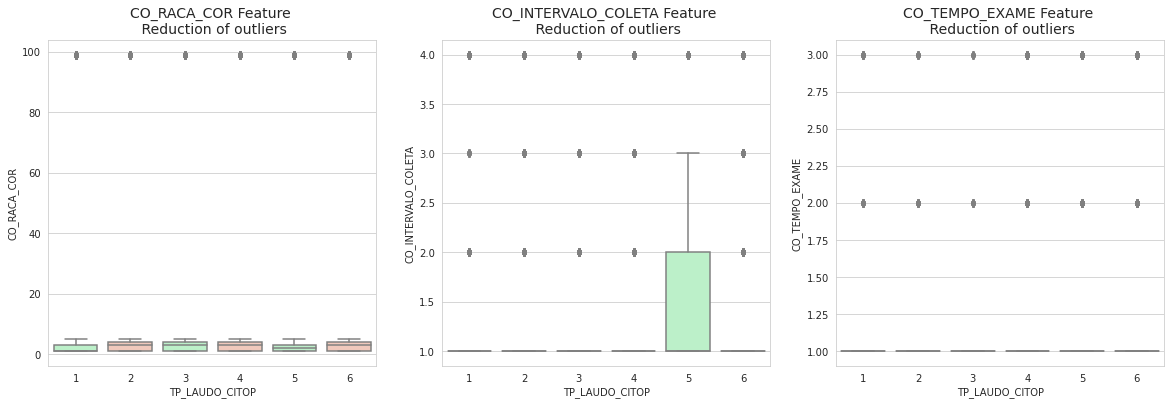

In [8]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed

# Feature CO_RACA_COR
sns.boxplot(x="TP_LAUDO_CITOP", y="CO_RACA_COR", data=df,ax=ax1, palette=colors)
ax1.set_title("CO_RACA_COR Feature \n Reduction of outliers", fontsize=14)

# Feature CO_INTERVALO_COLETA
sns.boxplot(x="TP_LAUDO_CITOP", y="CO_INTERVALO_COLETA", data=df, ax=ax2, palette=colors)
ax2.set_title("CO_INTERVALO_COLETA Feature \n Reduction of outliers", fontsize=14)


# Feature CO_TEMPO_EXAME
sns.boxplot(x="TP_LAUDO_CITOP", y="CO_TEMPO_EXAME", data=df, ax=ax3, palette=colors)
ax3.set_title("CO_TEMPO_EXAME Feature \n Reduction of outliers", fontsize=14)

plt.show()

Também podemos usar a gama interquartil. Que pode ser usado para ajudar a detectar valores atípicos. Tudo o que precisamos fazer é é o seguinte:

    1 - Calcule o intervalo interquartil para os nossos dados
    2 - Multiplicar o intervalo interquartil (IQR) pelo número 1.5
    3 - Adicionar 1,5 x (IQR) para o terceiro quartil. Qualquer número maior que este é um outlier suspeita.
    4 - Subtrair 1,5 x (IQR) a partir do primeiro quartil. Qualquer número menor que este é um outlier suspeita.
É importante lembrar que esta é uma regra de ouro e geralmente detém. Em geral, devemos seguir em nossa análise. Qualquer outlier potencial obtido por esse método devem ser examinados no contexto de todo o conjunto de dados.

**Tudo que estiver fora da faixa $[Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}]$ é considerado um ponto anômalo para aquele padrão**

Agora podemos identificar quais pontos encontram-se fora desse intervalo, ou seja, podem ser considerados outliers.

In [15]:
def detect_outliers(df, n, features):
    '''
    Função responsável para detectar outliers no dataset
    
    --------
    paramers:
        df: dataset para analise
        type: DataFrame ou Series
        
        n: informar o valor de até quantos outliers serão capturados
        type: int
        
        features: atributos da base de dados
        type: list
        
        return: list
        
    '''
    
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25) # Calcula o primeiro quartil
        Q3 = np.percentile(df[col], 75) # calcula o terceiro quartil
        
        IQR = Q3 - Q1 # Calcula o intervalo intequartil
        
        outlier_step = 1.5 * IQR # Multiplica o intervalo intequartil por 1.5
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index # retorna os índices dos registros que contém outlier
        
        outlier_indices.extend(outlier_list_col) # lista que contém os índices
        
    outlier_indices = Counter(outlier_indices) # transforma esses índices e as contagens dos mesmos em um dicionário
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) # retorna os índices
    
    return multiple_outliers

In [16]:
outliers_to_drop = detect_outliers(df, 2, list(df.select_dtypes(include=np.number).columns)) # pegando os índices dos valores discrepantes
outliers_to_drop[:10]

[40440, 40873, 47677, 47681, 47687, 47695, 47697, 47703, 47704, 47716]

In [17]:
data = df.drop(outliers_to_drop, axis = 0).reset_index(drop=True) # remove os outliers da base

### 2.3 Verificando se as classes estão desbalanceadas

Quando temos classes A e B de 80:20 ou 90:10 é considerado um conjunto de dados desequilibrado . Se tivermos esse conjunto de dados, o modelo ficará enviesado e levará ao ajuste excessivo do modelo.

A amostragem visa aumentar os registros da classe minoritária ou excluir os registros da classe majoritária para tornar o conjunto de dados como Conjunto de Dados Balanceado.

Por isso a importância de verificar se as classes estão em desequilibio e usar um método equivalete para tratá-lo.

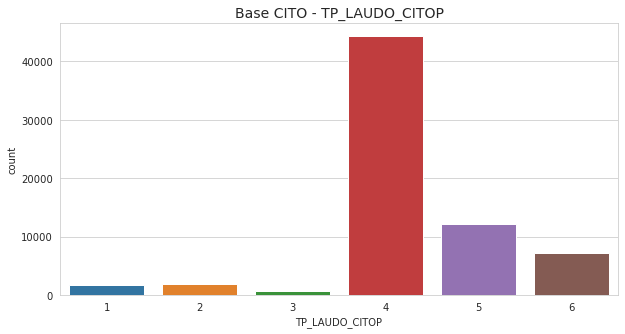

In [18]:
sns.countplot(x='TP_LAUDO_CITOP', data=data) # plota um gráfico countplot para verificar a distribuição das classes 
plt.title('Base CITO - TP_LAUDO_CITOP', fontsize=14)
plt.show()

In [13]:
data['TP_LAUDO_CITOP'].value_counts()

4    44347
5    12149
6     7229
2     1906
1     1623
3      741
Name: TP_LAUDO_CITOP, dtype: int64

In [14]:
# Quantidade de registros detectados como outliers em cada classe
(np.array(data['TP_LAUDO_CITOP'].value_counts().values) - np.array(df['TP_LAUDO_CITOP'].value_counts().values)) * (-1)

array([2125, 4778, 2717,  632,  595,  142])

### 2.3 - Verificando missing values

In [15]:
exploration[exploration['NA %'] > 0].sort_values(by='NA %', ascending=False)

,column,type,NA #,NA %
CO_ESCOLARIDADE,CO_ESCOLARIDADE,float64,78521,99.41
TP_PADR_CITO_MALIG_INDET,TP_PADR_CITO_MALIG_INDET,float64,78383,99.24
TP_PADR_CITO_POSI_MALIG,TP_PADR_CITO_POSI_MALIG,float64,76852,97.30
TP_PADR_CITO_SUSP_MALIG,TP_PADR_CITO_SUSP_MALIG,float64,76446,96.79
TP_DESCARGA_PAPILAR,TP_DESCARGA_PAPILAR,float64,63394,80.26
TP_PADRAO_CITOPATOL_AMOST,TP_PADRAO_CITOPATOL_AMOST,float64,60830,77.02
TP_PROC_BENI_NEGA_MALI_COMPATI,TP_PROC_BENI_NEGA_MALI_COMPATI,float64,33373,42.25
TP_RESULTA_PUNCAO_ASPIRATIVA,TP_RESULTA_PUNCAO_ASPIRATIVA,float64,28100,35.58
TP_NODULO,TP_NODULO,float64,19447,24.62
CO_TEM_NODULO,CO_TEM_NODULO,float64,5454,6.91


In [16]:
data = df.drop(exploration[exploration['NA %'] > 70]['column'], axis=1) # removendo as colunas com mais de 70% de valores ausentes

## 3 - Analisando as variáveis (Quantitativas e Qualitativas)

Nesta seção será realizado análises separadamente das features numéricas das categóricas. Essa fase é de extrema importância, pois podemos tirar insights valiosos que nos ajuda na modelagem dos algoritmos de machine learning.

In [17]:
num_features = data.select_dtypes(include=[np.number]).copy() # pega apenas as features quantitativas
cat_features = data.select_dtypes(exclude=[np.number]).copy() # pega apenas as features qualitativas

### 3.1 Quantitativas

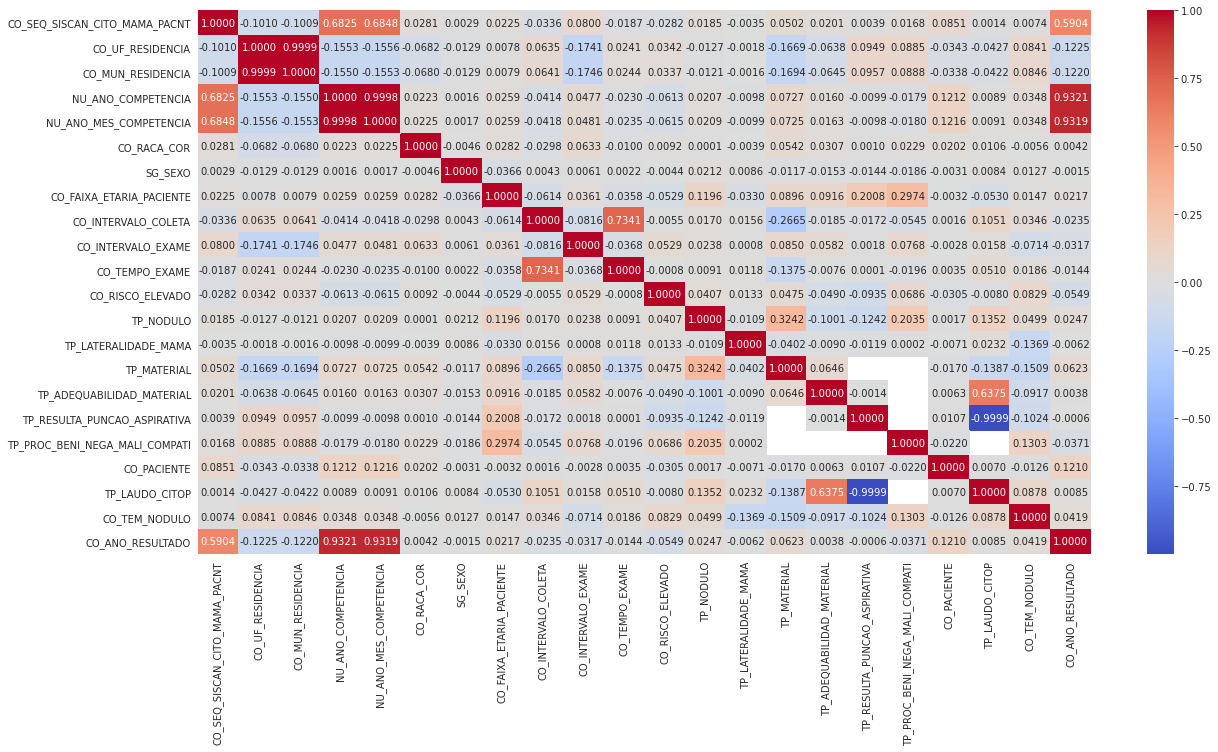

In [18]:
# Calcula a correlação das variáveis quantitativas usando o método de Person
plt.figure(figsize=(20, 10))
sns.heatmap(num_features.corr(), annot=True, fmt='.4f', cmap='coolwarm')
plt.show()

In [19]:
feature_select = num_features.corr()[num_features.corr()['TP_LAUDO_CITOP'] > 0].index

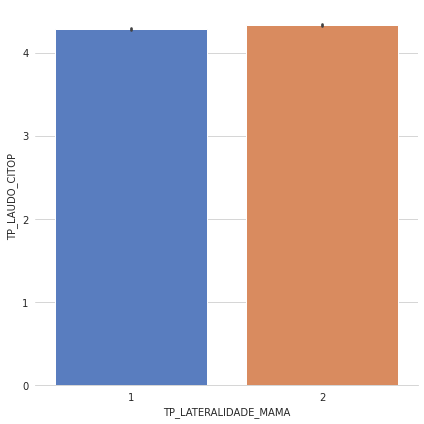

In [20]:
# Plota o catplot das variáveis TP_LATERALIDADE_MAMA e TP_LAUDO_CITOP.
g = sns.catplot(x="TP_LATERALIDADE_MAMA", y="TP_LAUDO_CITOP", data=num_features, kind="bar", height= 6, palette = "muted")
g.despine(left=True)
plt.show()

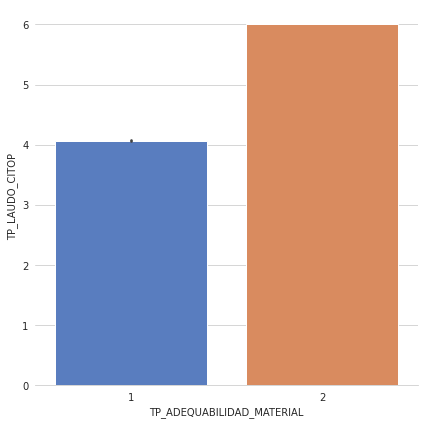

In [21]:
# Plota o catplot das variáveis Education_Num e Target.
g = sns.catplot(x="TP_ADEQUABILIDAD_MATERIAL", y="TP_LAUDO_CITOP", data=num_features, kind="bar", height= 6, palette = "muted")
g.despine(left=True)
plt.show()

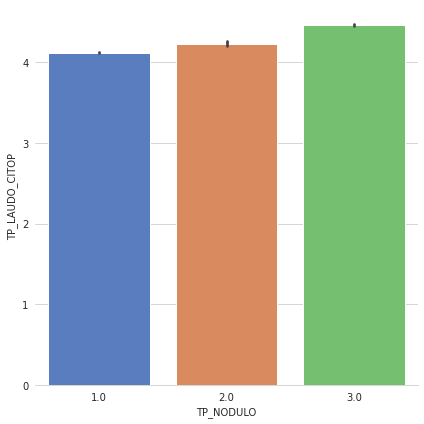

In [22]:
# Plota o catplot das variáveis Education_Num e Target.
g = sns.catplot(x="TP_NODULO", y="TP_LAUDO_CITOP", data=num_features, kind="bar", height= 6, palette = "muted")
g.despine(left=True)
plt.show()

### 3.2 - Quanlitativas

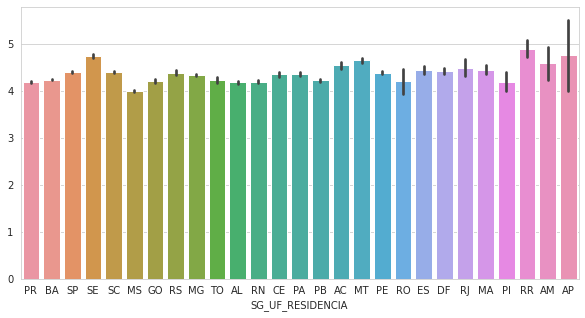

In [23]:
# Plota um barplot da variável Sex
g = sns.barplot(x="SG_UF_RESIDENCIA", y="TP_LAUDO_CITOP", data=data)
g.set_ylabel("")
plt.show()

## 4 - Preenchendo valores ausentes

In [24]:
num_features.isna().sum()

CO_SEQ_SISCAN_CITO_MAMA_PACNT         0
CO_UF_RESIDENCIA                      0
CO_MUN_RESIDENCIA                     0
NU_ANO_COMPETENCIA                    0
NU_ANO_MES_COMPETENCIA                0
CO_RACA_COR                           0
SG_SEXO                               0
CO_FAIXA_ETARIA_PACIENTE              0
CO_INTERVALO_COLETA                   0
CO_INTERVALO_EXAME                    0
CO_TEMPO_EXAME                        0
CO_RISCO_ELEVADO                      0
TP_NODULO                         19447
TP_LATERALIDADE_MAMA                  0
TP_MATERIAL                           0
TP_ADEQUABILIDAD_MATERIAL             0
TP_RESULTA_PUNCAO_ASPIRATIVA      28100
TP_PROC_BENI_NEGA_MALI_COMPATI    33373
CO_PACIENTE                           0
TP_LAUDO_CITOP                        0
CO_TEM_NODULO                      5454
CO_ANO_RESULTADO                      0
dtype: int64

In [25]:
num_features['TP_NODULO'].fillna(-1, inplace=True) # Substituir por -1

In [26]:
num_features['TP_RESULTA_PUNCAO_ASPIRATIVA'].fillna(-1, inplace=True) # Substituir por -1

In [27]:
num_features['TP_PROC_BENI_NEGA_MALI_COMPATI'].fillna(-1, inplace=True) # Substituir por -1

In [28]:
num_features['CO_TEM_NODULO'].fillna(-1, inplace=True) # Substituir por -1

## 5 - Feature Engineering (Sem pipeline)

#### Variáveis numéricas

Padronização é o processo de tornar a variável com média zero e variância um.

O processo é simples, basta subtrair a média dos dados de cada observação e dividi-los pelo desvio-padrão:

$$x_{\text{standardized}} = \frac{x - \bar{x}}{s}$$
onde $\bar{x}$ indica a média amostral e $s$ o desvio-padrão amostral.

In [29]:
for col in num_features.columns:
    if not 'TP_LAUDO_CITOP' in col: 
        scaler = StandardScaler()
        num_features[col] = scaler.fit_transform(num_features[col].values.reshape(-1, 1)) # aplica a padronização em todas as variáveis numéricas

#### Variáveis categóricas

In [30]:
onehot_encoder = OrdinalEncoder()
onehot_encoder.fit(cat_features.values.reshape(-1, 1))
cat_features['SG_UF_RESIDENCIA'] = onehot_encoder.transform(cat_features.values.reshape(-1, 1))

#### Balanceando as classes

In [31]:
X = num_features.drop('TP_LAUDO_CITOP', axis=1).copy()
y = num_features['TP_LAUDO_CITOP']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1996)

In [33]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

## 6 - Modelagem

Nesta seção iremos modelar os dados em algoritmos de aprendizagem supervicionado para problemas de classificação.

Vamos testar 5 algoritmos de machine learning:

    1 - Random Forest
    2 - AdaBoost
    3 - GradientBoosting
    4 - ExtraTrees
    5 - DecisionTree

Todos esses algoritmos são baseados em árvores

#### 6.1 - Validação

Nesta subseção iremos usar os algoritmos de machine learning sem fazer configurações de hyperparametros, servirá apenas como validação, também assim como uma forma de baseline.

In [39]:
s_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Validação cruzada com 5 folders

##### Random Forest

In [48]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_result = cross_val_score(rf, X_train, y_train, cv=s_kfold).mean() # retorna a média dos scores de cada etapa da validação
rf_result

0.9949112541129667

##### AdaBoostClassifier

In [49]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_result = cross_val_score(ada, X_train, y_train, cv=s_kfold).mean() # retorna a média dos scores de cada etapa da validação
ada_result

0.6637033427765042

##### GradientBoostingClassifier

In [50]:
gboost = GradientBoostingClassifier(n_estimators=100, random_state=0)
gboost_result = cross_val_score(gboost, X_train, y_train, cv=s_kfold).mean() # retorna a média dos scores de cada etapa da validação
gboost_result

0.9706886247987978

##### ExtraTreesClassifier

In [51]:
etrees = ExtraTreesClassifier(n_estimators=100, random_state=0)
etrees_result = cross_val_score(etrees, X_train, y_train, cv=s_kfold).mean() # retorna a média dos scores de cada etapa da validação
etrees_result

0.9961476775549605

##### DecisionTreeClassifier

In [52]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_result = cross_val_score(tree, X_train, y_train, cv=s_kfold).mean() # retorna a média dos scores de cada etapa da validação
tree_result

0.496924273591152

#### 6.2 - Criando o pipeline para a modelagem

In [79]:
# Pipeline responsável por imputar os dados e aplica o onehot encoder(variáveis categóricas nominais)
num_features_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(fill_value=-1)),
    ('std_scaler', StandardScaler())
])

# Pipeline responsável por aplica ordinal encoder nas variável categórica ordinal
cat_ordinal_transformer = Pipeline(steps=[
    ('ordinal encoder', OrdinalEncoder())
])

# Reune todos os pipeline de transformação
preprocessor = ColumnTransformer(transformers=[
    ('num_features', num_features_transformer, num_features.drop('TP_LAUDO_CITOP', axis=1).columns),
    #('cat_features', cat_ordinal_transformer, cat_features.columns)
])


# No final não estou usando nenhuma variável qualitativa, por enquanto.

In [80]:
def apply_pipeline(estimator, X, y, **kwargs):
    '''
    Função responsável por aplica todo o pepile de transformações nos dados
    parameters:
        estimator: Classificador
        type: sklearn object
        
        X: features
        type: matriz ou pandas.DataFrame
        
        y: class
        type: array 1-D ou pandas.Series
        
        return object pipeline
    '''

    smt = SMOTE(**kwargs)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', smt),
        ('cls', estimator)
    ])
    
    pipeline.fit(X, y)
    
    return pipeline

### 6.3 - Pesquisa por hiperparametros (Turning Model)

Os hiperparâmetros são importantes, pois controlam diretamente o comportamento do algoritmo de treinamento, tendo um impacto importante no desempenho do modelo em treinamento.

A escolha de hiperparâmetros apropriados desempenha um papel fundamental, dado o impacto no modelo aprendido. Por exemplo, se a taxa de aprendizado for muito baixa, o modelo perderá os padrões importantes nos dados; inversamente, se for alto, pode haver colisões.

A escolha de bons hiperparâmetros oferece dois benefícios principais:

* Pesquisa eficiente no espaço de possíveis hiperparâmetros; e
* Gerenciamento mais fácil de um grande conjunto de experimentos para ajuste de hiperparâmetros.

**É por isso que é importante a pesquisa por hyperparâmetros.**

In [81]:
def turning_model(estimator, X, y, params, n_splits=5, random_state=0, n_jobs=-1):
    s_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state) # Validação cruzada com 5 folders
    
    # Realiza a pesquisa dos hyperparâmetros
    random_cv = RandomizedSearchCV(estimator, param_distributions=params, cv=s_kfold, n_jobs=n_jobs, return_train_score=True)
    random_cv.fit(X=X, y=y)
    
    return random_cv

##### DecisionTreeClassifier

In [82]:
tree_pipeline = apply_pipeline(DecisionTreeClassifier(), X_train, y_train) # pipeline do modelo DecisionTree

# hyperparâmetros que serão reconfiguráveis
tree_params = {
        'cls__criterion': ['gini', 'entropy'],
        'cls__max_depth': [10, 20, 30, 40, 50, None],
        'cls__max_features': ['auto', 'log2'],
        'cls__min_samples_leaf': [1, 2, 4],
        'cls__min_samples_split': [2, 5, 10]
}

tree_cv = turning_model(tree_pipeline, X_train, y_train, params=tree_params) # retorna o modelo otimizado

In [83]:
tree_cv.best_params_, tree_cv.best_score_

({'cls__min_samples_split': 10,
  'cls__min_samples_leaf': 2,
  'cls__max_features': 'auto',
  'cls__max_depth': 30,
  'cls__criterion': 'entropy'},
 0.9774020774627843)

##### AdaBoostClassifier

In [84]:
ada_pipeline = apply_pipeline(AdaBoostClassifier(), X_train, y_train) # pipeline do modelo AdaBoost

# hyperparâmetros que serão reconfiguráveis
ada_params = {
        'cls__n_estimators': [200, 400, 600, 800, 1000, 1200],
        'cls__learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0],
        'cls__algorithm': ['SAMME', 'SAMME.R']
}

ada_cv = turning_model(ada_pipeline, X_train, y_train, params=ada_params) # retorna o modelo otimizado

In [85]:
ada_cv.best_params_, ada_cv.best_score_

({'cls__n_estimators': 1000,
  'cls__learning_rate': 0.5,
  'cls__algorithm': 'SAMME'},
 0.8960280542396619)

##### ExtraTreesClassifier

In [86]:
etrees_pipeline = apply_pipeline(ExtraTreesClassifier(), X_train, y_train) # pipeline do modelo ExtraTrees

# hyperparâmetros que serão reconfiguráveis
etrees_params = {
        'cls__bootstrap': [True, False],
        'cls__max_depth': [10, 20, 30, 40, 50, None],
        'cls__max_features': ['auto', 'log2'],
        'cls__min_samples_leaf': [1, 2, 4],
        'cls__min_samples_split': [2, 5, 10],
        'cls__n_estimators': [200, 400, 600, 800, 1000]
}

etrees_cv = turning_model(etrees_pipeline, X_train, y_train, params=etrees_params) # retorna o modelo otimizado

/home/igobarros/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [87]:
etrees_cv.best_params_, etrees_cv.best_score_

({'cls__n_estimators': 600,
  'cls__min_samples_split': 2,
  'cls__min_samples_leaf': 1,
  'cls__max_features': 'auto',
  'cls__max_depth': 30,
  'cls__bootstrap': False},
 0.9959586366784992)

##### RandomForestClassifier

In [88]:
rf_pipeline = apply_pipeline(RandomForestClassifier(), X_train, y_train) # pipeline do modelo RandomForest

# hyperparâmetros que serão reconfiguráveis
rf_params = {
        'cls__bootstrap': [True, False],
        'cls__max_depth': [10, 20, 30, 40, 50, None],
        'cls__max_features': ['auto', 'log2'],
        'cls__min_samples_leaf': [1, 2, 4],
        'cls__min_samples_split': [2, 5, 10],
        'cls__n_estimators': [200, 400, 600, 800, 1000]
}

rf_cv = turning_model(rf_pipeline, X_train, y_train, params=rf_params) # retorna o modelo otimizado

/home/igobarros/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [89]:
rf_cv.best_params_, rf_cv.best_score_

({'cls__n_estimators': 800,
  'cls__min_samples_split': 5,
  'cls__min_samples_leaf': 1,
  'cls__max_features': 'log2',
  'cls__max_depth': 40,
  'cls__bootstrap': False},
 0.9950440948612306)

### 6.4 - Plotando as linhas de aprendizado dos modelos

In [90]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title) # título dos gráficos
    
    if ylim is not None:
        plt.ylim(*ylim) # intervalo do eixo Y
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1) # calcula a média dos scores de treino
    train_scores_std = np.std(train_scores, axis=1) # calcula o desvio padrão dos scores de treino
    test_scores_mean = np.mean(test_scores, axis=1) # calcula a média dos scores de teste
    test_scores_std = np.std(test_scores, axis=1) # calcula o desvio padrão dos scores de teste
    
    plt.grid() # aplica linhas de grade no gráfico

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

/home/igobarros/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/igobarros/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<module 'matplotlib.pyplot' from '/home/igobarros/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

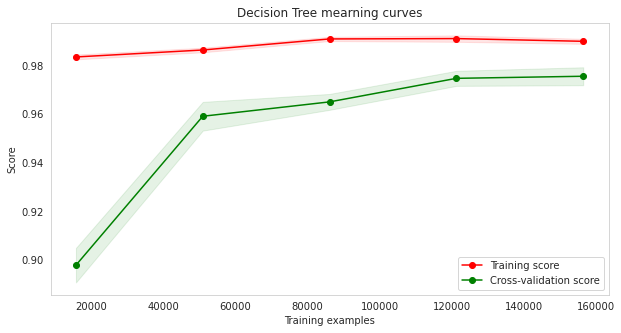

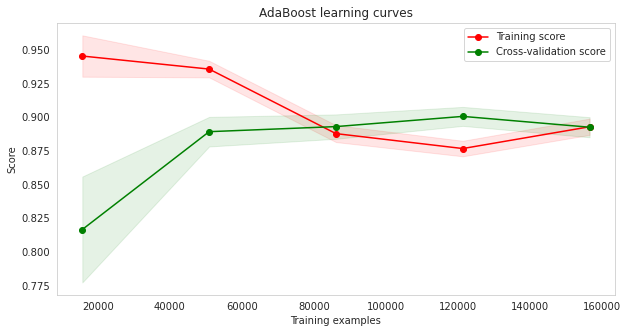

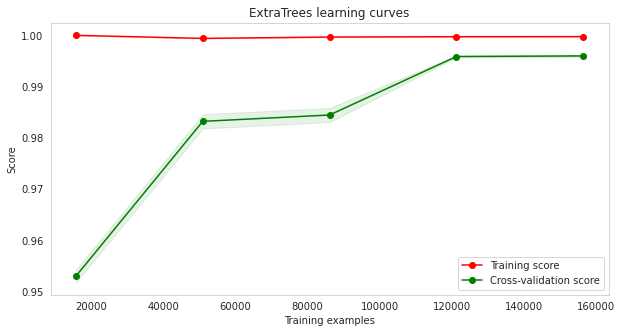

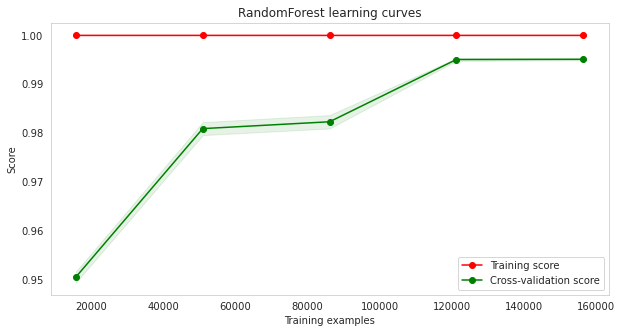

In [91]:
plot_learning_curve(tree_cv.best_estimator_, "Decision Tree mearning curves", X_train, y_train, cv=s_kfold)
plot_learning_curve(ada_cv.best_estimator_, "AdaBoost learning curves", X_train, y_train, cv=s_kfold)
plot_learning_curve(etrees_cv.best_estimator_, "ExtraTrees learning curves",X_train, y_train, cv=s_kfold)
plot_learning_curve(rf_cv.best_estimator_, "RandomForest learning curves", X_train, y_train, cv=s_kfold)

### 6.5 - Features Importances

[...] Vamos começar com árvores de decisão para construir alguma intuição. Nas árvores de decisão, cada nó é uma condição de como dividir valores em um único recurso, de modo que valores semelhantes da variável dependente terminem no mesmo conjunto após a divisão. A condição é baseada na impureza, que no caso de problemas de classificação é impureza de Gini / ganho de informação (entropia), enquanto para árvores de regressão sua variância. Portanto, ao treinar uma árvore, podemos calcular o quanto cada recurso contribui para diminuir a impureza ponderada. feature_importances_no Scikit-Learn é baseado nessa lógica, mas no caso da Random Forest, estamos falando sobre a média da diminuição da impureza nas árvores. [...]

Fonte: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [125]:
import eli5

def plot_features_importances(estimator, df):
        return eli5.explain_weights(estimator.named_steps['cls'], top=100, feature_names=list(df.columns))

In [136]:
plot_features_importances(ada_cv.best_estimator_, X)

Weight,Feature
0.4851 ± 0.9997,TP_RESULTA_PUNCAO_ASPIRATIVA
0.2675 ± 0.8869,TP_ADEQUABILIDAD_MATERIAL
0.1753 ± 0.7750,CO_MUN_RESIDENCIA
0.0242 ± 0.2730,TP_PROC_BENI_NEGA_MALI_COMPATI
0.0093 ± 0.1782,CO_RISCO_ELEVADO
0.0072 ± 0.1545,TP_LATERALIDADE_MAMA
0.0067 ± 0.1545,CO_RACA_COR
0.0065 ± 0.1411,CO_TEM_NODULO
0.0064 ± 0.1411,TP_NODULO
0.0052 ± 0.1262,CO_FAIXA_ETARIA_PACIENTE


In [155]:
plot_features_importances(rf_cv.best_estimator_, X)

Weight,Feature
0.3854 ± 0.1731,TP_RESULTA_PUNCAO_ASPIRATIVA
0.1653 ± 0.0873,TP_ADEQUABILIDAD_MATERIAL
0.1495 ± 0.0978,TP_PROC_BENI_NEGA_MALI_COMPATI
0.0730 ± 0.0790,TP_MATERIAL
0.0408 ± 0.0475,TP_NODULO
0.0207 ± 0.0170,CO_MUN_RESIDENCIA
0.0199 ± 0.0173,CO_UF_RESIDENCIA
0.0182 ± 0.0120,CO_FAIXA_ETARIA_PACIENTE
0.0156 ± 0.0167,CO_TEM_NODULO
0.0148 ± 0.0078,NU_ANO_MES_COMPETENCIA


In [156]:
plot_features_importances(etrees_cv.best_estimator_, X)

Weight,Feature
0.3929 ± 0.1738,TP_RESULTA_PUNCAO_ASPIRATIVA
0.1693 ± 0.0901,TP_ADEQUABILIDAD_MATERIAL
0.1524 ± 0.0979,TP_PROC_BENI_NEGA_MALI_COMPATI
0.0603 ± 0.0852,TP_MATERIAL
0.0338 ± 0.0428,TP_NODULO
0.0179 ± 0.0103,CO_FAIXA_ETARIA_PACIENTE
0.0168 ± 0.0125,CO_TEM_NODULO
0.0168 ± 0.0125,CO_MUN_RESIDENCIA
0.0160 ± 0.0112,CO_UF_RESIDENCIA
0.0160 ± 0.0073,CO_INTERVALO_EXAME


In [183]:
plot_features_importances(tree_cv.best_estimator_, X);

### 6.6 - Predição

#### AdaBoost

In [129]:
y_pred_baseline_ada = ada_pipeline.predict(X_test) # predição do modelo Adaboost

In [130]:
print(classification_report(y_test, y_pred_baseline_ada)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo de baseline

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       699
           2       0.53      1.00      0.70       766
           3       0.04      1.00      0.08       241
           4       1.00      0.98      0.99     13851
           5       0.00      0.00      0.00      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.74     23696
   macro avg       0.43      0.66      0.46     23696
weighted avg       0.73      0.74      0.73     23696



/home/igobarros/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
accuracy_score(y_test, y_pred_baseline_ada) # Métria roc_auc do modelo baseline

0.7433322079675895

Turning model

In [137]:
y_pred_cv_ada = ada_cv.predict(X_test) # Informa um pequeno relatório do resultado de algumas métricas dos modelo

In [138]:
print(classification_report(y_test, y_pred_cv_ada)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo com turning

              precision    recall  f1-score   support

           1       0.98      0.53      0.69       699
           2       0.72      1.00      0.84       766
           3       0.79      0.68      0.73       241
           4       1.00      0.98      0.99     13851
           5       0.93      0.99      0.96      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.97     23696
   macro avg       0.90      0.86      0.87     23696
weighted avg       0.97      0.97      0.97     23696



In [140]:
accuracy_score(y_test, y_pred_cv_ada) # Métria roc_auc do modelo com turning

0.9699949358541526

#### DecisionTreeClassifier

In [141]:
y_pred_baseline_tree = tree_pipeline.predict(X_test) # predição do modelo Adaboost

In [142]:
print(classification_report(y_test, y_pred_baseline_tree)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo de baseline

              precision    recall  f1-score   support

           1       0.94      0.96      0.95       699
           2       1.00      1.00      1.00       766
           3       0.53      0.70      0.60       241
           4       0.98      0.98      0.98     13851
           5       0.94      0.92      0.93      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.97     23696
   macro avg       0.90      0.93      0.91     23696
weighted avg       0.97      0.97      0.97     23696



In [143]:
accuracy_score(y_test, y_pred_baseline_tree) # Métria roc_auc do modelo baseline

0.9681380823767725

Turning model

In [145]:
y_pred_cv_tree = tree_cv.predict(X_test) # Informa um pequeno relatório do resultado de algumas métricas dos modelo

In [146]:
print(classification_report(y_test, y_pred_cv_tree)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo com turning

              precision    recall  f1-score   support

           1       0.90      0.92      0.91       699
           2       0.95      0.95      0.95       766
           3       0.43      0.59      0.50       241
           4       0.99      0.98      0.99     13851
           5       0.93      0.93      0.93      5123
           6       1.00      0.99      0.99      3016

    accuracy                           0.97     23696
   macro avg       0.87      0.89      0.88     23696
weighted avg       0.97      0.97      0.97     23696



In [147]:
accuracy_score(y_test, y_pred_cv_tree) # Métria roc_auc do modelo com turning

0.9658170155300473

#### RandomForestClassifier

In [148]:
y_pred_baseline_rf = rf_pipeline.predict(X_test) # predição do modelo Adaboost

In [149]:
print(classification_report(y_test, y_pred_baseline_rf)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo de baseline

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       699
           2       1.00      1.00      1.00       766
           3       0.98      0.68      0.80       241
           4       1.00      0.98      0.99     13851
           5       0.93      1.00      0.97      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.98     23696
   macro avg       0.99      0.94      0.96     23696
weighted avg       0.99      0.98      0.98     23696



In [150]:
accuracy_score(y_test, y_pred_baseline_rf) # Métria roc_auc do modelo baseline

0.9845121539500338

Turning model

In [151]:
y_pred_cv_rf = rf_cv.predict(X_test) # Informa um pequeno relatório do resultado de algumas métricas dos modelo

In [152]:
print(classification_report(y_test, y_pred_cv_rf)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo com turning

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       699
           2       1.00      1.00      1.00       766
           3       0.98      0.68      0.80       241
           4       1.00      0.98      0.99     13851
           5       0.93      1.00      0.97      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.98     23696
   macro avg       0.99      0.94      0.96     23696
weighted avg       0.99      0.98      0.98     23696



In [153]:
accuracy_score(y_test, y_pred_cv_rf) # Métria roc_auc do modelo com turning

0.9845121539500338

#### ExtraTreesClassifier

In [159]:
y_pred_baseline_etrees = etrees_pipeline.predict(X_test) # predição do modelo Adaboost

In [160]:
print(classification_report(y_test, y_pred_baseline_etrees)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo de baseline

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       699
           2       1.00      1.00      1.00       766
           3       0.94      0.68      0.79       241
           4       1.00      0.98      0.99     13851
           5       0.93      1.00      0.96      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.98     23696
   macro avg       0.98      0.94      0.95     23696
weighted avg       0.98      0.98      0.98     23696



In [161]:
accuracy_score(y_test, y_pred_baseline_etrees) # Métria roc_auc do modelo baseline

0.9837947332883187

Turning model

In [162]:
y_pred_cv_etrees = etrees_cv.predict(X_test) # Informa um pequeno relatório do resultado de algumas métricas dos modelo

In [163]:
print(classification_report(y_test, y_pred_cv_etrees)) # Informa um pequeno relatório do resultado de algumas métricas dos modelo com turning

              precision    recall  f1-score   support

           1       1.00      0.96      0.98       699
           2       1.00      1.00      1.00       766
           3       0.91      0.68      0.78       241
           4       1.00      0.98      0.99     13851
           5       0.93      1.00      0.96      5123
           6       1.00      1.00      1.00      3016

    accuracy                           0.98     23696
   macro avg       0.97      0.94      0.95     23696
weighted avg       0.98      0.98      0.98     23696



In [164]:
accuracy_score(y_test, y_pred_cv_etrees) # Métria roc_auc do modelo com turning

0.9838369345037137

## Modelagem final

In [3]:
features_to_drop = ['CO_MUN_RESIDENCIA', 'NU_ANO_COMPETENCIA', 'NU_ANO_MES_COMPETENCIA', 'CO_RACA_COR', 'CO_TEMPO_EXAME', 
'TP_EXAME_HISTOPATOLOGICO', 'TP_MATER_ENVIA_PROCEDENTE', 'TP_PROCEDIMENTO_CIRURGICO', 'TP_ADEQUABILIDAD_MATERIAL',
'CO_PACIENTE', 'CO_ANO_RESULTADO', 'SG_UF_RESIDENCIA', 'CO_ESCOLARIDADE', 
'TP_LESAO_CARAT_NEOPL_MALI', 'TP_GRAU_HISTOLOGICO', 'TP_MARGEM_CIRURGICA', 
'TP_DIAGNOSTICO_IMAGEM', 'TP_LESAO', 'ST_MICROCALCIFICACAO']

In [ ]:
repeat = []

for f in features_to_drop:
    if f in df.columns:
        repeat.append(f)

In [5]:
repeat

[]

In [248]:
repeat.remove('SG_UF_RESIDENCIA')
repeat.remove('CO_ESCOLARIDADE')
repeat.remove('CO_RACA_COR')
repeat.remove('CO_MUN_RESIDENCIA')
repeat.remove('CO_TEMPO_EXAME')

In [249]:
# repeat.append('TP_MATERIAL')
# repeat.append('TP_RESULTA_PUNCAO_ASPIRATIVA')
# repeat.append('TP_PROC_BENI_NEGA_MALI_COMPATI')

In [ ]:
params = {
  'n_estimators': 800,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'log2',
  'max_depth': 40,
  'bootstrap': False
}

rf = RandomForestClassifier(**params)
rf.fit(X_train.drop(repeat, axis=1).reset_index(drop=True), y_train)

In [224]:
y_pred_rf = rf.predict(X_test.drop(repeat, axis=1).reset_index(drop=True))

In [225]:
accuracy_score(y_test, y_pred_rf)

0.637027346387576